### Import Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

# plt.style.use('fivethertyeight')

import warnings
warnings.filterwarnings('ignore')

In [188]:
df = pd.read_csv('data/diabetes.csv')

In [189]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### EDA & Feature Engineering

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [191]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Handle Missing or Zero Values

In [192]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [193]:
df.duplicated().sum()

0

In [194]:
# Identify columns that might have missing values represented as zeros
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [195]:
# Replace zeros with NaN (to handle missing values properly)
df[columns_with_zeros] = df[columns_with_zeros].replace(0, pd.NA)

In [196]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

In [197]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


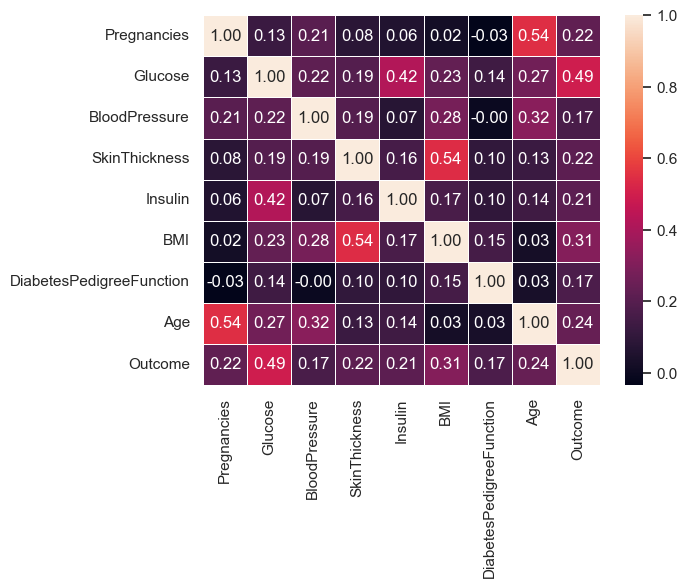

In [198]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linewidth=.5)
plt.show()

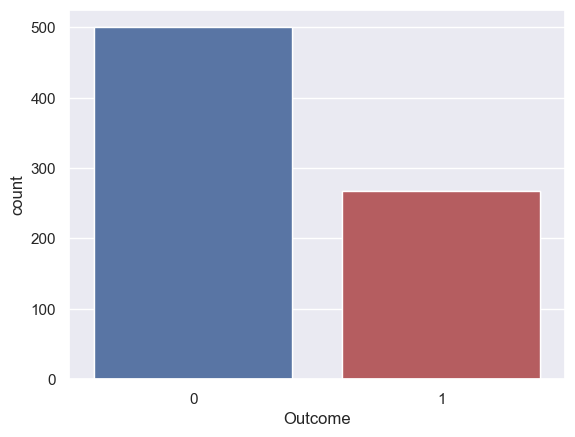

In [200]:
sns.countplot(x='Outcome', data=df, palette=['b','r'])
plt.show()

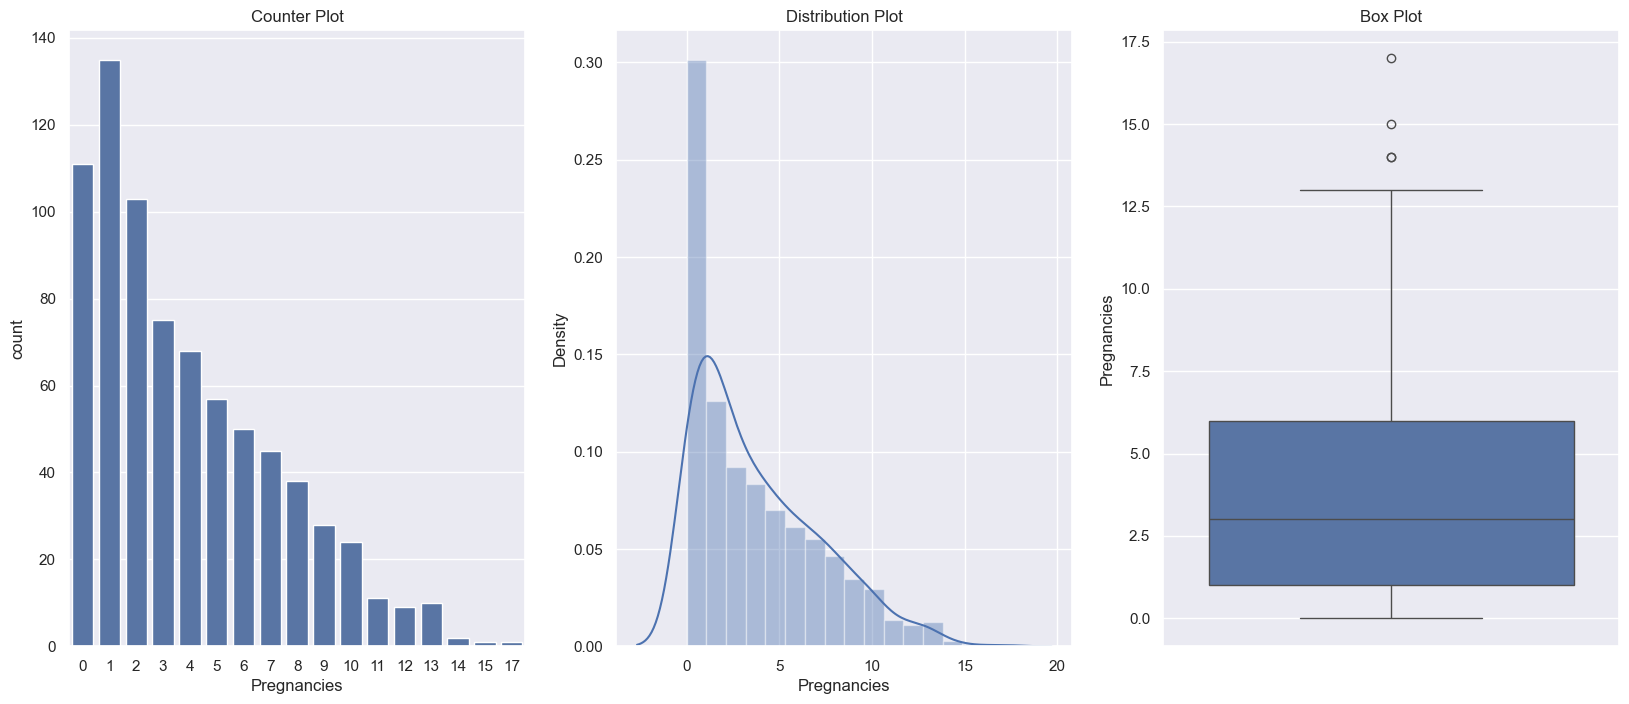

<Axes: title={'center': 'Box Plot'}, ylabel='Pregnancies'>

In [206]:
plt.show()
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies', data=df)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(df['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=df['Pregnancies'])

#### Boxplot of Features to Detect Outliers

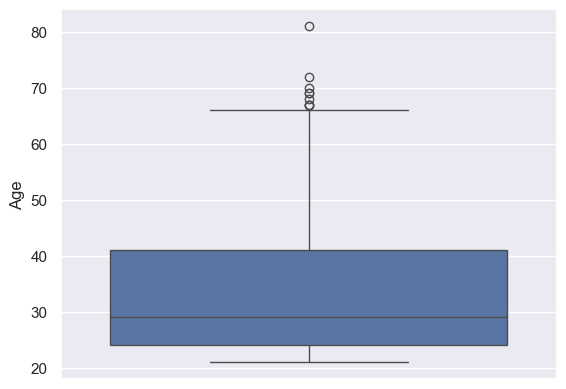

<Axes: ylabel='Age'>

In [81]:
plt.show()
sns.boxplot(df['Age'])

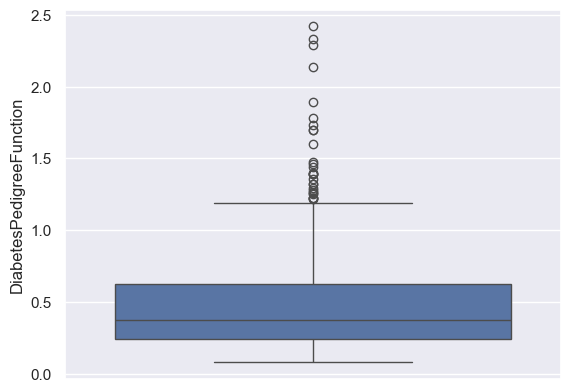

In [69]:
sns.boxplot(df['DiabetesPedigreeFunction'], palette=['b'])
plt.show()

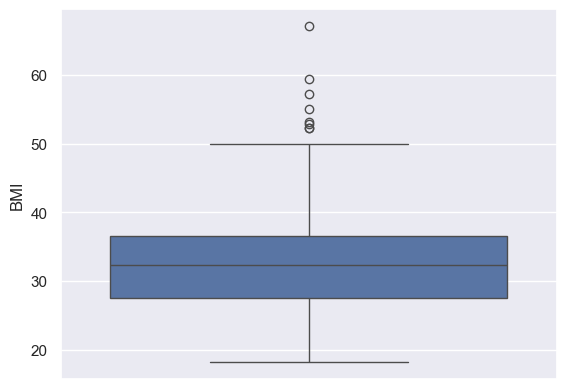

In [75]:
sns.boxplot(df['BMI'], palette=['b'])
plt.show()

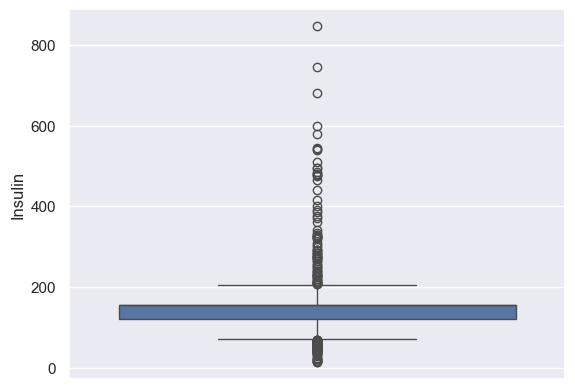

In [76]:
sns.boxplot(df['Insulin'], palette=['b'])
plt.show()

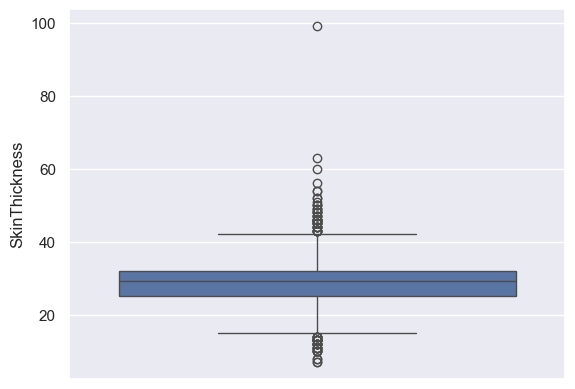

In [77]:
sns.boxplot(df['SkinThickness'], palette=['b'])
plt.show()

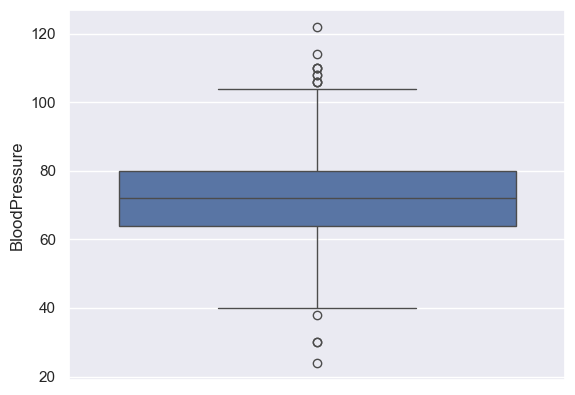

In [78]:
sns.boxplot(df['BloodPressure'], palette=['b'])
plt.show()

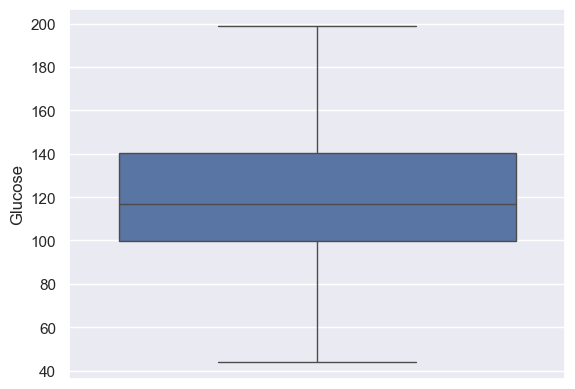

In [79]:
sns.boxplot(df['Glucose'], palette=['b'])
plt.show()

#### Create BMI Category

In [207]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df["BMI_Category"] = df["BMI"].apply(categorize_bmi)

In [208]:
df["BMI_Category"]

0           Obese
1      Overweight
2          Normal
3      Overweight
4           Obese
          ...    
763         Obese
764         Obese
765    Overweight
766         Obese
767         Obese
Name: BMI_Category, Length: 768, dtype: object

#### Apply Label Encoding to the BMI_Category column

In [209]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df["BMI_Category_Encoded"] = label_encoder.fit_transform(df["BMI_Category"])

# Drop the original categorical column 
df.drop(columns=["BMI_Category"], inplace=True)

In [210]:
df["BMI_Category_Encoded"]

0      1
1      2
2      0
3      2
4      1
      ..
763    1
764    1
765    2
766    1
767    1
Name: BMI_Category_Encoded, Length: 768, dtype: int32

In [211]:
# Print the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

Label Encoding Mapping: {'Normal': 0, 'Obese': 1, 'Overweight': 2, 'Underweight': 3}


#### Combine Glucos and BMI

In [212]:
df["Glucose_BMI"] = df["Glucose"] * df["BMI"]

In [213]:
df["Glucose_BMI"]

0      4972.8
1      2261.0
2      4263.9
3      2500.9
4      5904.7
        ...  
763    3322.9
764    4489.6
765    3170.2
766    3792.6
767    2827.2
Name: Glucose_BMI, Length: 768, dtype: float64

#### Combine Age and Pregnancies

In [214]:
df["Pregnancy_Age_Ratio"] = df["Pregnancies"] / df["Age"]

In [215]:
df["Pregnancy_Age_Ratio"]

0      0.120000
1      0.032258
2      0.250000
3      0.047619
4      0.000000
         ...   
763    0.158730
764    0.074074
765    0.166667
766    0.021277
767    0.043478
Name: Pregnancy_Age_Ratio, Length: 768, dtype: float64

#### Handle Outliers (IQR Method)

In [216]:
def winsorize_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

outlier_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]
df = winsorize_outliers(df, outlier_cols)

In [217]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Encoded,Glucose_BMI,Pregnancy_Age_Ratio
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.376538,28.911883,143.937487,32.395615,0.458914,33.240885,0.348958,1.110677,3997.905618,0.108210
std,3.369578,30.435949,11.696836,7.443497,39.496793,6.667466,0.285596,11.760232,0.476951,0.612338,1469.626543,0.081790
min,0.000000,44.000000,40.000000,14.500000,70.427665,18.200000,0.078000,21.000000,0.000000,0.000000,1100.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000,1.000000,2928.825000,0.041667
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000,1.000000,3756.600000,0.095238
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000,1.000000,4812.550000,0.166667
max,17.000000,199.000000,104.000000,42.500000,206.620558,50.250000,1.200000,81.000000,1.000000,3.000000,10692.000000,0.368421


#### Check Skewness

In [218]:
skewness = df.skew()
skewness

Pregnancies                 0.901674
Glucose                     0.532719
BloodPressure               0.100925
SkinThickness              -0.075925
Insulin                    -0.508054
BMI                         0.348866
DiabetesPedigreeFunction    1.024428
Age                         1.129597
Outcome                     0.635017
BMI_Category_Encoded        0.070990
Glucose_BMI                 0.885153
Pregnancy_Age_Ratio         0.614387
dtype: float64

#### Apply Log to Highly Skewed Features:

In [219]:
df["DiabetesPedigreeFunction"] = np.log1p(df["DiabetesPedigreeFunction"])  
df["Pregnancies"] = np.log1p(df["Pregnancies"])
df["Age"] = np.log1p(df["Age"])

In [220]:
skewness = df.skew()
skewness

Pregnancies                -0.243478
Glucose                     0.532719
BloodPressure               0.100925
SkinThickness              -0.075925
Insulin                    -0.508054
BMI                         0.348866
DiabetesPedigreeFunction    0.703791
Age                         0.614664
Outcome                     0.635017
BMI_Category_Encoded        0.070990
Glucose_BMI                 0.885153
Pregnancy_Age_Ratio         0.614387
dtype: float64

#### Normalize Continuous Features

In [221]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "Glucose_BMI", "Pregnancy_Age_Ratio"]
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [222]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Encoded,Glucose_BMI,Pregnancy_Age_Ratio
0,1.945910,0.865108,-0.032212,0.818444,0.294158,0.180754,0.486738,1.437767,1,1,0.663794,0.144246
1,0.693147,-1.206162,-0.545506,0.011846,0.294158,-0.869804,0.300845,-0.050575,0,2,-1.182639,-0.929227
2,2.197225,2.015813,-0.716604,0.032470,0.294158,-1.365068,0.514021,0.047687,1,0,0.181112,1.734723
3,0.693147,-1.074652,-0.545506,-0.794752,-1.265167,-0.644685,0.154436,-1.247065,0,2,-1.019294,-0.741294
4,0.000000,0.503458,-2.769778,0.818444,0.609624,1.606512,0.788457,0.143015,1,1,1.298314,-1.323886
...,...,...,...,...,...,...,...,...,...,...,...,...
763,2.397895,-0.680125,0.309983,1.826691,0.913644,0.075698,0.157858,2.162819,0,1,-0.459604,0.618088
764,1.098612,0.010298,-0.203310,-0.257020,0.294158,0.661009,0.292670,-0.476974,0,1,0.334789,-0.417632
765,1.791759,-0.022579,-0.032212,-0.794752,-0.809137,-0.929836,0.219136,-0.151956,0,2,-0.563575,0.715187
766,0.693147,0.141808,-1.058799,0.032470,0.294158,-0.344525,0.299364,1.244178,1,1,-0.139790,-1.063579


#### Handle Imbalanced Data

In [223]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [224]:
y = df['Outcome']
X = df.drop('Outcome', axis=1)

In [103]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [225]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [226]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [228]:
# Another way to handle imbalanced data (duplicates real samples) 
# works better for small datasets 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

print('Old data set shape:', Counter(y))
print('New data set shape:', Counter(y_res))

Old data set shape: Counter({0: 500, 1: 268})
New data set shape: Counter({1: 500, 0: 500})


In [229]:
X = X_res
y = y_res
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

### Split the data into training and testing sets

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [231]:
print('X_train shape is: ', X_train.shape)
print('X_test shape is: ', X_test.shape)
print('y_train shape is: ', y_train.shape)
print('y_test shape is: ', y_test.shape)

X_train shape is:  (800, 11)
X_test shape is:  (200, 11)
y_train shape is:  (800,)
y_test shape is:  (200,)


### Model Training

#### Logistic Regression Training

In [232]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) or L2 (Ridge)
    'solver': ['liblinear']  # 'liblinear' supports both L1 and L2
}

# Create a logistic regression model
lr = LogisticRegression()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
lr_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


#### Model Evaluation

In [233]:
model_names = ['Logistic Regression Training', 'SVC', 'Random Forest Classifier', 'Gradient Boosting Classifier']
accuracy_result = [];
precision_result = [];
recall_result = [];
f1_result = [];

In [238]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

def evaluate(model):
    
    print(model)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_result.append(accuracy)
    precision_result.append(precision)
    recall_result.append(recall)
    f1_result.append(f1)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
    plt.show()

LogisticRegression(C=1, solver='liblinear')
Accuracy: 0.755
Precision: 0.7549019607843137
Recall: 0.7623762376237624
F1-score: 0.7586206896551724

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75        99
           1       0.75      0.76      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200


Confusion Matrix:
 [[74 25]
 [24 77]]


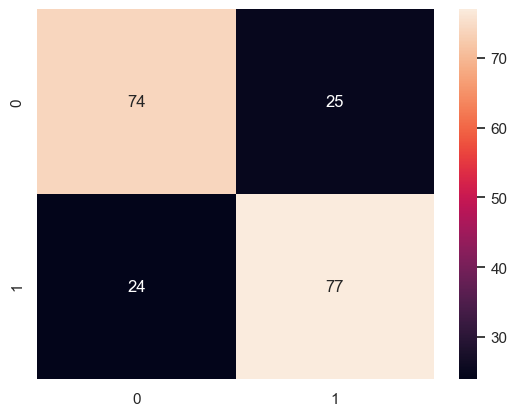

In [249]:
y_pred_lr = evaluate(lr_model)

#### Support Vector Classifier (SVC)

In [240]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Perform Grid Search
svc = SVC()
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

# Get best parameters and model
best_svc = grid_search_svc.best_estimator_
print("Best Parameters for SVC:", grid_search_svc.best_params_)

best_svc.fit(X_train, y_train)

Best Parameters for SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=1)

#### Model Evaluation

SVC(C=1)
Accuracy: 0.755
Precision: 0.7241379310344828
Recall: 0.8316831683168316
F1-score: 0.7741935483870968

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.68      0.73        99
           1       0.72      0.83      0.77       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200


Confusion Matrix:
 [[67 32]
 [17 84]]


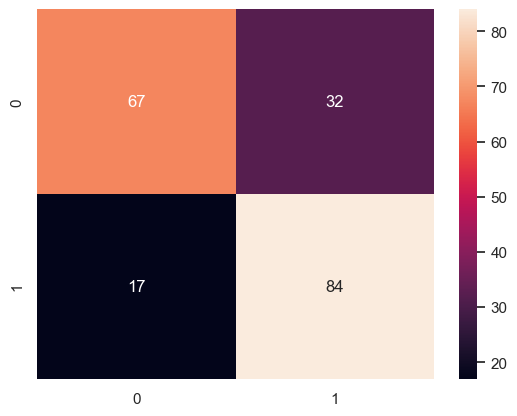

In [250]:
evaluate(best_svc)

#### Random Forest Classifier

In [242]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [100, 300, 500, 1000],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf
    'bootstrap': [True, False]  # Use bootstrapping
}

# Perform Randomized Search
rf = RandomForestClassifier(class_weight='balanced')
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=5, scoring='accuracy', 
                                      n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get best parameters and model
best_rf = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:", random_search_rf.best_params_)

# Train final model
best_rf.fit(X_train, y_train)

Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=300)

#### Model Evaluation

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=300)
Accuracy: 0.82
Precision: 0.7876106194690266
Recall: 0.8811881188118812
F1-score: 0.8317757009345794

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        99
           1       0.79      0.88      0.83       101

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200


Confusion Matrix:
 [[75 24]
 [12 89]]


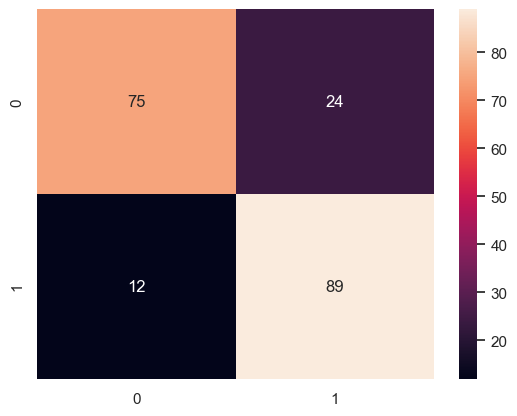

In [251]:
evaluate(best_rf)

#### Gradient Boosting Classifier

In [244]:
# Define hyperparameter distribution for Gradient Boosting
param_dist_gb = {
    'n_estimators': [500, 1000],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Randomized Search
gb = GradientBoostingClassifier()
random_search_gb = RandomizedSearchCV(gb, param_distributions=param_dist_gb, 
                                      n_iter=10, cv=5, scoring='accuracy', 
                                      n_jobs=-1, random_state=42)
random_search_gb.fit(X_train, y_train)

# Get best parameters and model
best_gb = random_search_gb.best_estimator_
print("Best Parameters for Gradient Boosting:", random_search_gb.best_params_)

# Train final model
best_gb.fit(X_train, y_train)

Best Parameters for Gradient Boosting: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.2}


GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=1000)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=4,
                           min_samples_split=5, n_estimators=1000)
Accuracy: 0.84
Precision: 0.8108108108108109
Recall: 0.8910891089108911
F1-score: 0.8490566037735849

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83        99
           1       0.81      0.89      0.85       101

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200


Confusion Matrix:
 [[78 21]
 [11 90]]


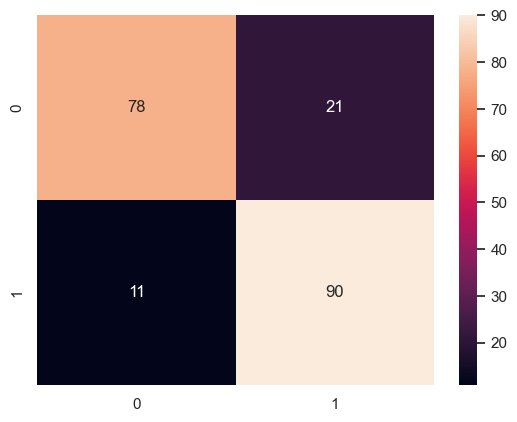

In [252]:
evaluate(best_gb)

In [253]:
f1_result

[0.7586206896551724,
 0.7741935483870968,
 0.8317757009345794,
 0.8490566037735849]

In [254]:
df_results = pd.DataFrame(data = {'Algorithm': model_names,
                     'Accuracies': accuracy_result,
                     'Precision': precision_result,
                     'Recall' : recall_result,
                     'F1': f1_result})
df_results

,Algorithm,Accuracies,Precision,Recall,F1
0,Logistic Regression Training,0.755,0.754902,0.762376,0.758621
1,SVC,0.755,0.724138,0.831683,0.774194
2,Random Forest Classifier,0.820,0.787611,0.881188,0.831776
3,Gradient Boosting Classifier,0.840,0.810811,0.891089,0.849057


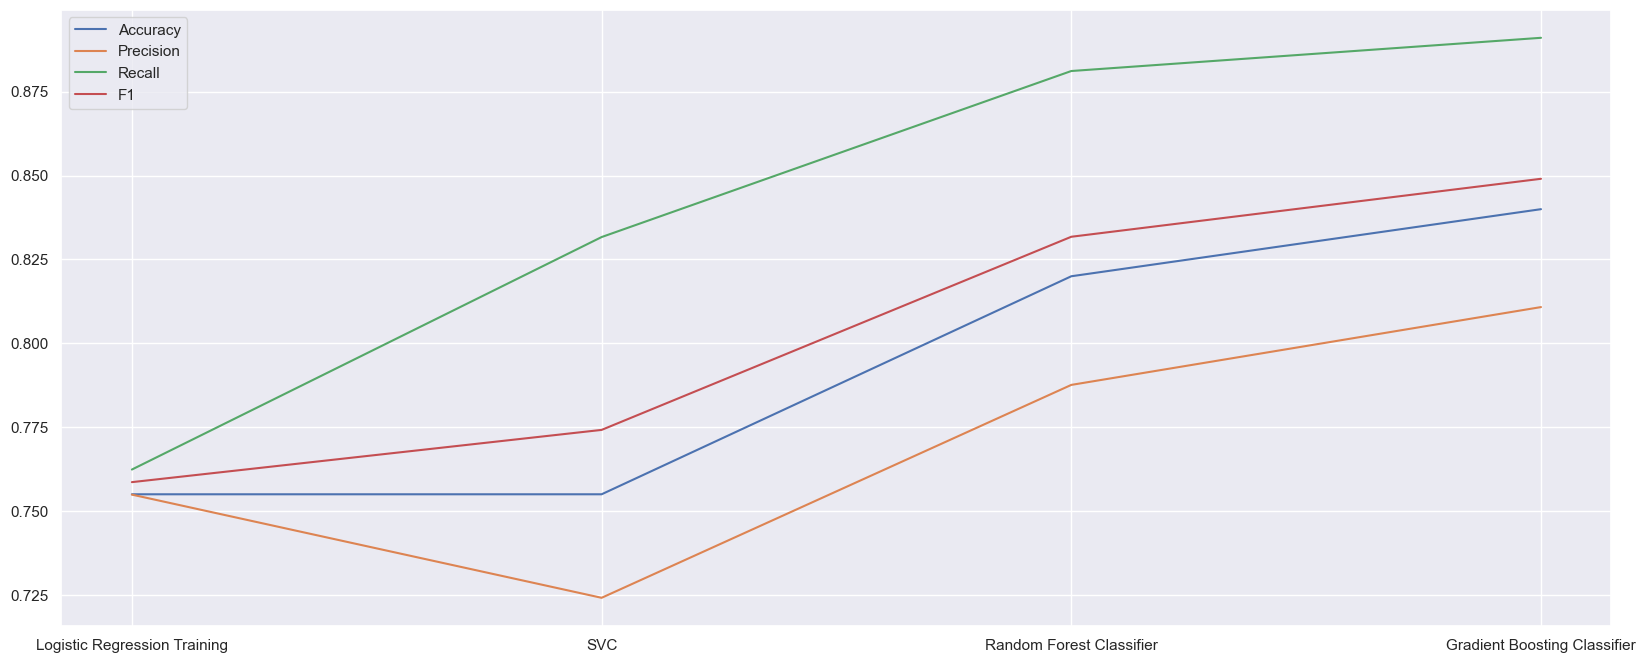

In [258]:
plt.show()
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(df_results['Algorithm'], accuracy_result, label='Accuracy')
plt.plot(df_results['Algorithm'], precision_result, label='Precision')
plt.plot(df_results['Algorithm'], recall_result, label='Recall')
plt.plot(df_results['Algorithm'], f1_result, label='F1')
plt.legend()